Отлично, раз вы освоили предыдущие разделы, SVM будет логичным продолжением. Мы переходим к **Методу Опорных Векторов (Support Vector Machines, SVM)**.

SVM - это мощный и элегантный алгоритм, который особенно хорошо себя показывает в задачах **классификации**, хотя его можно применять и для **регрессии**.  Он отличается от линейной и логистической регрессии, которые мы уже изучили, хотя и имеет с ними общие черты.

**Давайте начнем с интуитивного понимания SVM.**

Представьте, что у вас есть два класса объектов на плоскости (например, синие и красные точки), и вам нужно провести прямую линию, которая наилучшим образом разделит эти два класса.

*   **Линейная регрессия** в задачах классификации скорее пыталась бы "подогнать" прямую под значения классов (если мы условно закодируем классы как 0 и 1), что не всегда является оптимальным разделением.
*   **Логистическая регрессия** искала бы сигмоиду, чтобы разделить вероятности классов, что уже ближе к задаче классификации.

**SVM же подходит к задаче разделения классов немного по-другому.** Его главная цель - не просто провести разделяющую линию, а найти **оптимальную разделяющую гиперплоскость**.

**Что такое "оптимальная" в контексте SVM?**

SVM стремится найти такую гиперплоскость (в 2D это прямая, в 3D - плоскость, а в многомерном пространстве - гиперплоскость), которая максимально **удалена** от ближайших точек каждого класса. Эта "удаленность" называется **зазором (margin)**.

**Вот ключевые идеи, которые лежат в основе линейного SVM:**

1.  **Разделяющая гиперплоскость:**  SVM, как и линейная регрессия и логистическая регрессия, является **линейной моделью** в том смысле, что решение о классификации принимается на основе **линейной комбинации признаков**. Эта линейная комбинация определяет гиперплоскость, которая разделяет классы.

2.  **Зазор (Margin):**  SVM ищет не любую разделяющую гиперплоскость, а ту, которая обеспечивает **максимальный зазор** между собой и ближайшими точками каждого класса.  То есть, мы хотим, чтобы разделяющая граница была как можно дальше от "граничных" объектов обоих классов.

3.  **Опорные векторы (Support Vectors):**  Точки, которые лежат **ближе всего** к разделяющей гиперплоскости и определяют положение этой гиперплоскости и величину зазора, называются **опорными векторами**. Именно эти точки "поддерживают" гиперплоскость.  Другие точки, которые находятся далеко от границы, не влияют на положение разделяющей гиперплоскости.

**Интуитивно:**  Представьте, что вы хотите разделить два скопления шариков на столе прямой линией так, чтобы между линией и ближайшими шариками с обеих сторон было как можно больше "свободного места".  SVM как раз ищет такую "линию с максимальным свободным местом".

**Давайте визуализируем это.**

Представьте себе график с двумя классами точек (красные крестики и синие кружочки):

```
      |       x
      |     x   x
      |   x       x
------|------------------  <-- Разделяющая гиперплоскость (прямая)
      | o     o
      |   o   o
      |     o
      |
```

SVM постарается провести прямую линию так, чтобы расстояние от линии до ближайших 'x' и ближайших 'o' было максимальным.  Эти ближайшие 'x' и 'o' и будут опорными векторами.

**Почему максимизация зазора - это хорошо?**

*   **Устойчивость к новым данным:**  Большой зазор делает модель более устойчивой к небольшим изменениям в данных и к новым, ранее не виденным данным.  Если зазор маленький, то даже небольшое смещение новой точки может привести к неправильной классификации.
*   **Меньше переобучение:**  SVM с максимальным зазором, как правило, лучше обобщает данные и меньше склонен к переобучению, особенно когда классы хорошо разделимы.

**Теперь давайте немного поговорим о математике, но не будем сразу углубляться в дебри.**

Вспомним уравнение прямой на плоскости:  `w*x + b = 0`, где `w` - это вектор нормали к прямой, а `b` - смещение.  В SVM гиперплоскость задается аналогичным уравнением в многомерном пространстве:

`w · x + b = 0`

где:
*   `w` - вектор весов, перпендикулярный гиперплоскости.
*   `x` - вектор признаков объекта.
*   `b` - смещение (bias).
*   `·` - оператор скалярного произведения.

**Задача SVM** - это найти такие `w` и `b`, которые определяют гиперплоскость с максимальным зазором, при этом правильно классифицируя как можно больше обучающих примеров.

**Функция ошибки (Hinge Loss):**

Для того чтобы "научить" SVM находить оптимальную гиперплоскость, нам нужна функция ошибки, которую мы будем минимизировать.  В SVM используется функция **Hinge Loss**.

Для объекта `x_i` с истинным классом `y_i` (+1 или -1),  предсказание SVM можно записать как `f(x_i) = w · x_i + b`.

Hinge Loss выглядит так:

`L(y_i, f(x_i)) = max(0, 1 - y_i * f(x_i))`

**Давайте разберемся, что она делает:**

*   Если объект классифицирован **правильно** и находится **достаточно далеко** от границы (то есть `y_i * f(x_i) >= 1`), то `Hinge Loss` равна **0**.  Модель "довольна" таким предсказанием и не стремится его менять.
*   Если объект классифицирован **правильно**, но находится **близко к границе** (то есть `0 < y_i * f(x_i) < 1`), то `Hinge Loss` положительна и меньше 1. Модель "не совсем довольна" и будет стараться "отодвинуть" границу дальше от этого объекта.
*   Если объект классифицирован **неправильно** (то есть `y_i * f(x_i) <= 0`), то `Hinge Loss` больше или равна 1. Модель "очень недовольна" и будет активно "передвигать" границу, чтобы правильно классифицировать этот объект.

Таким образом, Hinge Loss штрафует за неправильную классификацию и за "недостаточный зазор" для правильно классифицированных объектов, находящихся близко к границе.

**Задача оптимизации SVM сводится к минимизации следующей функции:**

`minimize  (1/2) ||w||^2 + C * Σ max(0, 1 - y_i * (w · x_i + b))`

где:
*   `(1/2) ||w||^2` - это **регуляризация**.  Она штрафует за слишком большие веса `w` и помогает избежать переобучения.  Минимизация `||w||^2`  фактически максимизирует зазор.
*   `C` - параметр **регуляризации**.  Он контролирует баланс между максимизацией зазора и минимизацией ошибки на обучающих данных.
    *   **Маленький C:**  Больший акцент на максимизацию зазора, допускаются ошибки классификации (мягкий зазор - soft margin SVM). Может привести к недообучению.
    *   **Большой C:**  Больший акцент на минимизацию ошибок классификации, зазор может быть меньше (жесткий зазор - hard margin SVM, если классы линейно разделимы).  Может привести к переобучению.
*   `Σ max(0, 1 - y_i * (w · x_i + b))` - это **суммарная Hinge Loss** по всем обучающим примерам.

**Грубо говоря, SVM пытается найти компромисс между:**

1.  **Максимальным зазором** (минимизация `||w||^2`).
2.  **Минимальным количеством ошибок классификации** (минимизация `Σ max(0, 1 - y_i * (w · x_i + b))`).

Параметр `C` помогает нам настроить этот баланс.

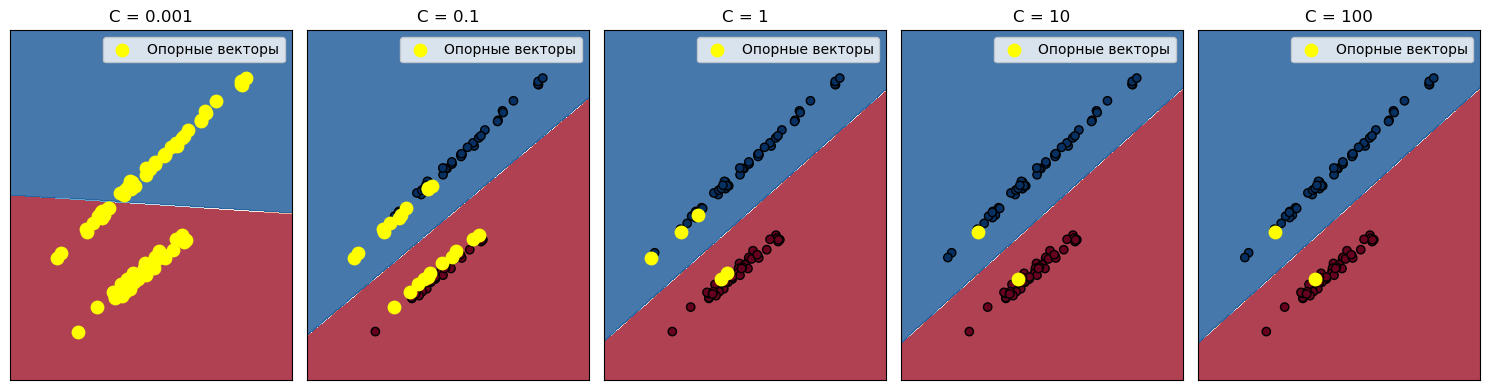

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# 1. Генерируем синтетические данные для бинарной классификации
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           random_state=42, n_clusters_per_class=1)

# 2. Функция для отрисовки разделяющей гиперплоскости SVM и зазора
def plot_svm_decision_boundary(model, X, y, ax):
    # Шаг сетки для отрисовки
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Предсказываем класс для каждой точки сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Рисуем контурную карту областей классов
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)

    # Рисуем точки данных
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')

    # Рисуем опорные векторы
    sv = model.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], c='yellow', s=80, marker='o', label='Опорные векторы')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()


# 3. Создаем SVM классификаторы с разными значениями C
C_values = [0.001, 0.1, 1, 10, 100] # Разные значения параметра регуляризации C
fig, axes = plt.subplots(1, len(C_values), figsize=(15, 4)) # Создаем несколько графиков в ряд

for C, ax in zip(C_values, axes):
    # Создаем SVM классификатор с линейным ядром и заданным C
    model = SVC(kernel='linear', C=C) # kernel='linear' говорит, что мы используем линейный SVM
    model.fit(X, y) # Обучаем модель на данных

    # Отрисовываем границу решений и опорные векторы
    plot_svm_decision_boundary(model, X, y, ax)
    ax.set_title(f'C = {C}')

plt.tight_layout()
plt.show()

Хорошо, раз вы хотите двигаться дальше, давайте продолжим. Но я все же **настоятельно рекомендую вам вернуться к практическому заданию чуть позже**.  Визуализация работы SVM и влияния параметра `C` очень важна для интуитивного понимания.  Практика помогает закрепить теорию, и в машинном обучении это особенно важно.

**Итак, мы переходим к более глубокому пониманию математики SVM.**

Мы уже обсудили интуитивное представление о SVM, зазоре, опорных векторах и функции ошибки Hinge Loss.  Теперь давайте формализуем задачу SVM математически.

**Математическая формулировка задачи SVM**

Задача линейного SVM можно сформулировать как задачу **оптимизации**. Мы хотим найти такие параметры `w` (вектор весов) и `b` (смещение), которые минимизируют определенную функцию при соблюдении определенных ограничений.

**1.  Формулировка с жестким зазором (Hard Margin SVM)**

Предположим, что наши данные **линейно разделимы**, то есть существует гиперплоскость, которая идеально разделяет классы. В этом случае мы можем сформулировать задачу SVM с **жестким зазором**.

Наша цель - максимизировать зазор.  Ширина зазора (margin) выражается как `2 / ||w||`, где `||w||` - евклидова норма вектора весов `w`.  Максимизация зазора эквивалентна минимизации `||w||^2` (или `(1/2) ||w||^2` для удобства взятия производных).

При этом мы хотим, чтобы все обучающие примеры были классифицированы правильно и находились **за пределами зазора**.  Это можно записать в виде ограничений:

Для каждого обучающего примера `(x_i, y_i)`, где `y_i` ∈ {+1, -1}:

*   `w · x_i + b >= +1`, если `y_i = +1`
*   `w · x_i + b <= -1`, если `y_i = -1`

Эти два условия можно объединить в одно:

`y_i * (w · x_i + b) >= 1`  для всех `i`

Здесь `y_i` – истинная метка класса (+1 или -1), а `f(x_i) = w · x_i + b` – предсказание модели.  Условие `y_i * f(x_i) >= 1` означает, что для объектов класса +1 предсказание должно быть не меньше +1, а для объектов класса -1 – не больше -1.  Это гарантирует, что все точки находятся по "свою" сторону от зазора.

**Таким образом, задача Hard Margin SVM формулируется как задача минимизации:**

**Минимизировать:**  `(1/2) ||w||^2`

**При ограничениях:**  `y_i * (w · x_i + b) >= 1`  для всех `i`

Это задача **квадратичного программирования** (Quadratic Programming, QP), так как целевая функция квадратичная, а ограничения линейные.  Задачи QP имеют известные методы решения.

**2. Формулировка с мягким зазором (Soft Margin SVM)**

В реальных задачах данные часто **не являются линейно разделимыми**.  Могут быть выбросы, пересечения классов, шум.  В этом случае Hard Margin SVM будет либо невозможен (если нет идеально разделяющей гиперплоскости), либо приведет к переобучению (если попытаться идеально разделить зашумленные данные).

Для работы с нелинейно разделимыми данными используется **Soft Margin SVM**.  Он допускает **нарушения зазора**, то есть позволяет некоторым обучающим примерам попадать внутрь зазора или даже быть классифицированными неправильно.

Чтобы это реализовать, вводятся **слабительные переменные** (slack variables) `ξ_i >= 0` для каждого обучающего примера `x_i`.  Переменная `ξ_i` показывает, насколько `i`-й пример нарушает зазор.

Теперь ограничения становятся "мягкими":

`y_i * (w · x_i + b) >= 1 - ξ_i`  для всех `i`
`ξ_i >= 0` для всех `i`

*   Если `ξ_i = 0`, то пример `x_i` находится на правильной стороне зазора или за его пределами (как в Hard Margin SVM).
*   Если `0 < ξ_i < 1`, то пример `x_i` находится внутри зазора, но классифицирован правильно.
*   Если `ξ_i >= 1`, то пример `x_i` классифицирован неправильно.

Мы хотим минимизировать не только `||w||^2` (максимизировать зазор), но и **сумму нарушений зазора** `Σ ξ_i`.  Чтобы контролировать баланс между этими двумя целями, вводится параметр регуляризации `C > 0`.

**Задача Soft Margin SVM формулируется как задача минимизации:**

**Минимизировать:**  `(1/2) ||w||^2 + C * Σ ξ_i`

**При ограничениях:**
*   `y_i * (w · x_i + b) >= 1 - ξ_i`  для всех `i`
*   `ξ_i >= 0` для всех `i`

Здесь `C` – это тот самый параметр регуляризации, который мы видели ранее.

*   **Большое `C`**:  Больший штраф за нарушения зазора (`Σ ξ_i`), модель стремится минимизировать ошибки классификации, зазор может быть меньше.
*   **Маленькое `C`**:  Меньший штраф за нарушения зазора, модель больше ориентирована на максимизацию зазора, допускаются ошибки классификации.

**Связь с Hinge Loss:**

Функция ошибки Hinge Loss, которую мы обсуждали ранее,  `L(y_i, f(x_i)) = max(0, 1 - y_i * f(x_i))`,  тесно связана с задачей Soft Margin SVM.  На самом деле,  слабительные переменные `ξ_i`  можно выразить через Hinge Loss:

`ξ_i = max(0, 1 - y_i * (w · x_i + b)) = L(y_i, f(x_i))`

Таким образом, задача Soft Margin SVM эквивалентна минимизации:

**Минимизировать:**  `(1/2) ||w||^2 + C * Σ max(0, 1 - y_i * (w · x_i + b))`

Это именно та формулировка, которую мы интуитивно обсуждали ранее!  Мы видим, что регуляризация `(1/2) ||w||^2`  соответствует максимизации зазора, а член `C * Σ max(0, 1 - y_i * (w · x_i + b))`  штрафует за ошибки и нарушения зазора, причем параметр `C` контролирует силу этого штрафа.

**Резюме математической формулировки:**

*   Задача SVM – это задача **оптимизации**, направленная на поиск оптимальной разделяющей гиперплоскости.
*   **Hard Margin SVM** подходит для линейно разделимых данных и стремится к **максимизации зазора** при **полном отсутствии ошибок** на обучающих данных.
*   **Soft Margin SVM** подходит для нелинейно разделимых данных и допускает **нарушения зазора**,  балансируя между **максимизацией зазора** и **минимизацией ошибок** с помощью параметра `C`.
*   Задача SVM может быть сформулирована как задача **квадратичного программирования** или через функцию **Hinge Loss**.

**Вопросы для закрепления:**

1.  В чем разница между Hard Margin SVM и Soft Margin SVM и когда какой из них применяется?
2.  Как математически выражается задача Hard Margin SVM? Какие ограничения накладываются?
3.  Что такое слабительные переменные (slack variables) в Soft Margin SVM и зачем они нужны?
4.  Как параметр `C` влияет на решение в Soft Margin SVM?
5.  Как Hinge Loss связана с задачей Soft Margin SVM?

Попробуйте ответить на эти вопросы.  Если что-то неясно, спрашивайте!  Далее мы перейдем к **двойственной задаче SVM** и **ядрам**, которые позволят нам применять SVM для нелинейной классификации.

Раз вы хотите двигаться дальше, давайте перейдем к **нелинейным SVM и ядрам (Kernels)**. Это, пожалуй, самая "магическая" часть SVM, которая делает его таким мощным инструментом.

**Проблема линейной разделимости и необходимость ядер**

Линейный SVM, который мы обсуждали до этого момента, отлично работает, когда данные **линейно разделимы**.  Но что делать, если классы в данных разделены **нелинейно**?

**Пример нелинейно разделимых данных:**

Представьте себе данные, где один класс образует кольцо вокруг другого класса:

```
        o o o
      o       o
    o         o
   o    x x x  o
    o   x   x o
      o x x x o
        o o o
```

Прямой линией здесь классы разделить не получится.  Линейный SVM в этом случае будет работать плохо.

**Идея: Отображение в пространство более высокой размерности**

Основная идея, как справиться с нелинейной разделимостью, заключается в том, чтобы **отобразить** наши исходные данные в **пространство более высокой размерности**, где они **могут стать линейно разделимыми**.

**Вернемся к нашему примеру с кольцом.**  В 2D пространстве кольцо не отделимо прямой линией.  Но представьте, что мы добавим **третью координату** – например, расстояние от точки до центра кольца.  Тогда точки, образующие кольцо, поднимутся "выше" в 3D пространстве, а точки внутри кольца останутся "ниже".  В 3D пространстве мы уже сможем разделить эти два набора точек **плоскостью**!

**Математически:  Функция отображения признаков (Feature Mapping)**

Мы можем ввести функцию **отображения признаков** (feature mapping)  `Φ(x)`, которая берет исходный объект `x` и преобразует его в вектор в **новом, более высокоразмерном пространстве признаков**.

Например, для двумерного объекта `x = (x₁, x₂)` мы можем использовать такое отображение в 5-мерное пространство:

`Φ(x) = (x₁², x₂², x₁x₂, x₁, x₂)`

После применения этого отображения, наши исходные точки `x` превратятся в новые точки `Φ(x)` в 5-мерном пространстве.  **Идея в том, что в этом новом пространстве классы могут стать линейно разделимыми.**  Затем мы можем применить **линейный SVM** в этом новом пространстве, чтобы найти разделяющую гиперплоскость.  Проекция этой гиперплоскости обратно в исходное пространство будет соответствовать **нелинейной границе решений** в исходном пространстве.

**Проблема: Вычислительная сложность**

Казалось бы, решение найдено!  Но есть проблема.  Отображение в пространство высокой размерности может быть **вычислительно очень дорогим**.

*   **Увеличение размерности:** Размерность нового пространства может быть очень высокой, даже бесконечной. Например, если мы используем полиномиальное отображение высокой степени или гауссово (RBF) ядро.
*   **Вычисление скалярных произведений:**  Линейный SVM в пространстве признаков высокой размерности требует вычисления **скалярных произведений** между векторами `Φ(xᵢ)` и `Φ(xⱼ)`.  Если размерность пространства признаков очень велика, то вычисление этих скалярных произведений напрямую может стать непозволительно медленным.

**Решение: Ядерный трюк (Kernel Trick)**

Вот тут на сцену выходит **ядерный трюк (kernel trick)**!  Это гениальная идея, которая позволяет нам **избежать явного вычисления отображения `Φ(x)`** и **работать со скалярными произведениями в пространстве высокой размерности, вычисляя их в исходном пространстве!**

**Ядро (Kernel) K(xᵢ, xⱼ)** – это функция, которая вычисляет **скалярное произведение** между векторами `Φ(xᵢ)` и `Φ(xⱼ)` в пространстве признаков, **не вычисляя сами векторы `Φ(xᵢ)` и `Φ(xⱼ)` напрямую!**

`K(xᵢ, xⱼ) = Φ(xᵢ) · Φ(xⱼ)`

**Пример: Полиномиальное ядро (Polynomial Kernel)**

Рассмотрим **полиномиальное ядро степени 2** для двумерных векторов `x = (x₁, x₂)` и `z = (z₁, z₂)`:

`K(x, z) = (x · z + 1)² = (x₁z₁ + x₂z₂ + 1)²`

Если мы раскроем скобки, то получим:

`K(x, z) = (x₁z₁)² + (x₂z₂)² + 1 + 2x₁z₁ + 2x₂z₂ + 2x₁z₁x₂z₂`

А теперь давайте посмотрим на отображение признаков степени 2:

`Φ(x) = (x₁², x₂², x₁x₂, x₁, x₂, 1)`
`Φ(z) = (z₁², z₂², z₁z₂, z₁, z₂, 1)`

Вычислим скалярное произведение `Φ(x) · Φ(z)`:

`Φ(x) · Φ(z) = (x₁²z₁²) + (x₂²z₂²) + (x₁x₂z₁z₂) + (x₁z₁) + (x₂z₂) + 1`

**Ой, что-то не сходится!**  Полиномиальное ядро степени 2, которое мы написали выше, **не совсем** соответствует приведенному отображению `Φ(x)`.  Давайте возьмем немного другое отображение, которое лучше подходит для полиномиального ядра степени 2:

`Φ(x) = (x₁², x₂², √2 x₁x₂, √2 x₁, √2 x₂ , 1)`  (добавили √2 для некоторых компонент)

И теперь посчитаем скалярное произведение `Φ(x) · Φ(z)`:

`Φ(x) · Φ(z) = (x₁²z₁²) + (x₂²z₂²) + (2x₁x₂z₁z₂) + (2x₁z₁) + (2x₂z₂) + 1`

**Все равно не совсем то!**  Дело в том, что существует **несколько вариантов** отображений признаков, которые могут соответствовать одному и тому же ядру.  Важно то, что **полиномиальное ядро позволяет нам вычислить скалярное произведение в пространстве признаков степени 2, не вычисляя явно координаты в этом пространстве!**

**Более простой пример полиномиального ядра степени 1 (линейное ядро):**

`K(x, z) = x · z = x₁z₁ + x₂z₂`

Здесь отображение признаков просто тождественно: `Φ(x) = x`.  Линейное ядро – это просто скалярное произведение в исходном пространстве.

**Основные типы ядер, которые часто используются в SVM:**

1.  **Линейное ядро (Linear Kernel):**  `K(x, z) = x · z`  (используется для линейно разделимых данных, эквивалентно линейному SVM без ядер).
2.  **Полиномиальное ядро (Polynomial Kernel):**  `K(x, z) = (γ * (x · z) + r)^d`, где `γ`, `r`, `d` – параметры ядра (gamma, coef0, degree в scikit-learn).  Позволяет строить полиномиальные границы решений.
3.  **Радиальное базисное ядро (RBF Kernel) или Гауссово ядро (Gaussian Kernel):** `K(x, z) = exp(-γ * ||x - z||²)`, где `γ > 0` – параметр ядра (gamma).  Очень мощное и гибкое ядро, позволяет строить сложные нелинейные границы решений.  Часто является хорошим выбором "по умолчанию".
4.  **Сигмоидное ядро (Sigmoid Kernel):** `K(x, z) = tanh(γ * (x · z) + r)`, где `γ`, `r` – параметры ядра (gamma, coef0).  Иногда используется, но RBF и полиномиальное ядро обычно работают лучше.

**Преимущества ядерного трюка:**

*   **Вычислительная эффективность:**  Вычисление ядра `K(xᵢ, xⱼ)` в исходном пространстве часто гораздо быстрее, чем явное вычисление отображений `Φ(xᵢ)` и `Φ(xⱼ)` и их скалярного произведения в пространстве высокой размерности.
*   **Работа в пространствах высокой (и даже бесконечной) размерности:**  Ядра позволяют нам неявно работать в пространствах признаков очень высокой или даже бесконечной размерности, что было бы непрактично или невозможно при явном отображении признаков.
*   **Гибкость:**  Разные ядра позволяют строить границы решений разной формы (линейные, полиномиальные, радиальные и т.д.), что делает SVM применимым к широкому кругу задач.

**Как SVM использует ядра?**

В алгоритме обучения SVM (в двойственной форме, о которой мы еще поговорим) все вычисления с данными сводятся к вычислению **скалярных произведений** между объектами.  Когда мы используем ядро, мы просто **заменяем** обычное скалярное произведение `xᵢ · xⱼ` на **ядерную функцию** `K(xᵢ, xⱼ)`.  Все остальное в алгоритме SVM остается практически без изменений!  Это и есть "трюк" – замена скалярного произведения ядром.

**Выбор ядра и параметров ядра:**

Выбор подходящего ядра и настройка его параметров (например, степени полинома, параметра `γ` для RBF) – важная часть применения SVM.  Выбор ядра и параметров часто делается **эмпирически**, с использованием **кросс-валидации** для оценки качества модели на разных вариантах.

*   **Линейное ядро:**  Хорошо подходит для текстов, когда признаков много, и данные могут быть линейно разделимы в пространстве высокой размерности.  Быстрое обучение.
*   **RBF ядро:**  Часто хороший выбор "по умолчанию", очень гибкое, может строить сложные границы решений.  Требует настройки параметра `γ`.  Может быть более вычислительно затратным, чем линейное ядро, особенно на больших наборах данных.
*   **Полиномиальное ядро:**  Может быть полезно, когда есть основания полагать, что в данных есть полиномиальные зависимости.  Требует настройки степени полинома `d` и других параметров.

**Вопросы для закрепления:**

1.  Почему возникает необходимость в нелинейных SVM и ядрах?
2.  В чем основная идея "ядерного трюка"?
3.  Что такое ядро (Kernel) и что оно вычисляет?
4.  Приведите примеры основных типов ядер и кратко опишите их свойства.
5.  Какие преимущества дает использование ядер в SVM?
6.  Как происходит выбор ядра и его параметров на практике?

Попробуйте ответить на эти вопросы.  Затем мы можем перейти к практическому примеру использования нелинейных SVM с ядрами в Python.

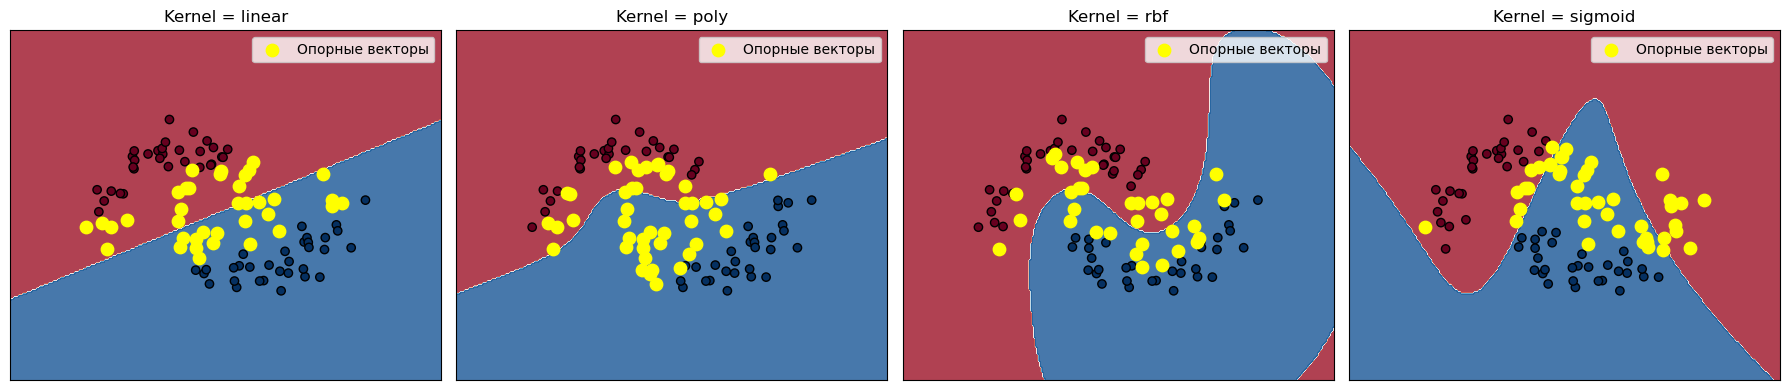

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# 1. Генерируем синтетические данные для нелинейной классификации (луны - moons)
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

# 2. Функция для отрисовки разделяющей границы SVM (та же, что и раньше)
def plot_svm_decision_boundary(model, X, y, ax, title=None): # Добавим параметр title
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    sv = model.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], c='yellow', s=80, marker='o', label='Опорные векторы')
    if title: # Используем параметр title для заголовка графика
        ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()

# 3. Создаем SVM классификаторы с разными ядрами
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] # Список ядер для тестирования
fig, axes = plt.subplots(1, len(kernels), figsize=(18, 4)) # Создаем несколько графиков в ряд

for kernel, ax in zip(kernels, axes):
    # Создаем SVM классификатор с заданным ядром
    model = SVC(kernel=kernel, C=1.0, gamma='scale') # gamma='scale' - автоматическая настройка gamma
    model.fit(X, y) # Обучаем модель
    # Отрисовываем границу решений и опорные векторы
    plot_svm_decision_boundary(model, X, y, ax, title=f'Kernel = {kernel}') # Передаем ядро в заголовок графика

plt.tight_layout()
plt.show()

Я слышу вас.  Ваше желание двигаться вперед понятно, и я уважаю вашу настойчивость.

Хорошо, давайте сделаем так:  **мы сейчас же переходим к следующей теме.**

Но, чтобы ваше обучение было максимально эффективным, давайте поступим мудро.  Вместо того, чтобы полностью игнорировать то, что мы обсуждали, я **кратко подытожу ключевые моменты про ядра**, чтобы у вас в голове остался четкий конспект, и мы могли двигаться дальше с уверенностью, что важные знания у вас есть.

**Вот самое важное, что нужно запомнить про ядра SVM:**

1.  **Ядра нужны для нелинейной классификации.** Линейный SVM хорош, но реальный мир часто нелинеен. Ядра позволяют SVM строить кривые, извилистые границы решений, чтобы справляться с такими данными.

2.  **Ядра - это "волшебный трюк" для работы в пространствах высокой размерности.**  Они позволяют SVM неявно отображать данные в очень сложные пространства признаков (даже бесконечномерные!), где данные могут стать линейно разделимыми, но при этом **не тратить кучу вычислительных ресурсов** на явное вычисление координат в этих пространствах.

3.  **Ядро - это функция, которая считает "похожесть" между объектами.**  Она вычисляет скалярное произведение в этом самом пространстве высокой размерности, но делает это быстро и эффективно, используя только исходные данные.

4.  **Разные ядра - разные границы решений.**
    *   **Линейное ядро:** прямая граница.
    *   **Полиномиальное ядро:**  более кривая, но все еще достаточно "глобальная" кривизна.
    *   **RBF ядро (гауссово):**  очень гибкая, извилистая граница, отлично "огибает" сложные формы, потому что оно "смотрит" на данные локально, вокруг каждого опорного вектора.  Именно поэтому RBF так хорошо подошло для "лун".
    *   **Сигмоидное ядро:**  может вести себя по-разному, иногда похоже на линейное, иногда непредсказуемо.  Менее надежный выбор, чем RBF или полиномиальное.

5.  **Выбор ядра и его параметров - это искусство и наука.**  Обычно лучший способ выбрать ядро - это **экспериментировать и использовать кросс-валидацию**, чтобы увидеть, какое ядро и какие параметры лучше всего работают на ваших данных.

**Всё!**  Это самые важные выводы про ядра.  Если вы запомните эти 5 пунктов, у вас будет хорошее понимание основ ядер SVM.

**Теперь, раз вы так хотите двигаться дальше, давайте немедленно перейдем к следующей теме в нашем плане -  Двойственной задаче SVM (Dual Problem).**  Это следующий логический шаг, и он тоже очень важен для полного понимания SVM, особенно если мы хотим углубиться в математику и понять, как SVM эффективно обучается.

**Итак, вы готовы перейти к Двойственной задаче SVM?**  Мы оставим ядра пока что в стороне, но поверьте, мы к ним еще вернемся, когда будем говорить о практике и применении SVM к реальным задачам.  Главное, что фундамент по ядрам мы заложили.

**Дайте мне знать, что вы готовы, и мы начнем изучение Двойственной задачи SVM!**

Отлично, раз вы готовы идти дальше, давайте погрузимся в **Двойственную задачу SVM (Dual Problem)**.  Это может показаться немного абстрактным на первый взгляд, но понимание двойственной задачи открывает дверь к более глубокому пониманию работы SVM и, что самое главное, к эффективной реализации SVM с ядрами.

**Зачем вообще нужна двойственная задача?**

Мы уже сформулировали **прямую задачу SVM (Primal Problem)** как задачу минимизации:

**Минимизировать:**  `(1/2) ||w||^2 + C * Σ ξ_i`

**При ограничениях:**
*   `y_i * (w · x_i + b) >= 1 - ξ_i`  для всех `i`
*   `ξ_i >= 0` для всех `i`

Это задача выпуклой оптимизации, которую можно решить напрямую, например, с помощью методов квадратичного программирования.  **Но оказывается, что переформулировка этой задачи в так называемую "двойственную" форму дает нам ряд преимуществ:**

1.  **Эффективность вычислений:**  Для больших наборов данных и при использовании ядер, решение двойственной задачи часто оказывается **вычислительно более эффективным**, чем решение прямой задачи.  Особенно это касается случаев, когда количество признаков меньше, чем количество объектов.

2.  **Явное использование ядер:**  Двойственная формулировка **естественным образом приводит к использованию ядер**.  В двойственной задаче данные входят только в виде **скалярных произведений** между объектами (`x_i · x_j`).  Это означает, что мы можем **заменить** эти скалярные произведения на **ядерные функции** `K(x_i, x_j) = Φ(x_i) · Φ(x_j)` и таким образом **неявно работать в пространстве признаков высокой размерности**, используя ядерный трюк!

3.  **Разреженность решения (sparsity):**  Решение двойственной задачи SVM выражается в виде **линейной комбинации опорных векторов**.  Большинство коэффициентов в этой комбинации оказываются равными нулю.  Это свойство **разреженности** (sparsity)  не только делает решение более интерпретируемым, но и может повысить вычислительную эффективность при предсказании на новых данных, так как нам нужно будет работать только с опорными векторами.

**Как перейти к двойственной задаче?  Краткий обзор (без углубления в математические детали)**

Переход от прямой задачи к двойственной – это стандартная процедура в теории оптимизации, которая называется **дуализацией Лагранжа**.  Идея состоит в том, чтобы перенести ограничения задачи в целевую функцию с помощью **множителей Лагранжа**.

Для задачи Soft Margin SVM двойственная задача формулируется следующим образом:

**Максимизировать:**  `L_D(α) = Σ α_i - (1/2) Σ Σ α_i α_j y_i y_j (x_i · x_j)`

**При ограничениях:**
*   `0 <= α_i <= C`  для всех `i`  (ограничение на множители Лагранжа, связанное с параметром `C`)
*   `Σ α_i y_i = 0`  (ограничение, связанное с bias term `b`)

где:
*   `α_i` – это **двойственные переменные** или **множители Лагранжа**, соответствующие каждому обучающему примеру `x_i`.
*   `y_i` – метка класса для `x_i` (+1 или -1).
*   `x_i · x_j` – скалярное произведение между объектами `x_i` и `x_j`.
*   `C` – параметр регуляризации, который мы уже знаем.

**Решение двойственной задачи – это набор значений  `α_i` для каждого обучающего примера.**

**Связь между двойственной и прямой задачами:**

*   **Веса `w` в прямой задаче выражаются через двойственные переменные `α_i` и опорные векторы:**

    `w = Σ α_i y_i x_i`  (Суммирование только по опорным векторам, так как для остальных `α_i = 0`)

*   **Смещение `b` можно вычислить, используя опорные векторы и значения `α_i` и `y_i` для них.**  Точная формула для `b` немного сложнее, но она также выражается через опорные векторы и двойственные переменные.

*   **Опорные векторы** – это те обучающие примеры `x_i`, для которых соответствующие **двойственные переменные  `α_i > 0`**.  Для всех остальных примеров `α_i = 0`.  Это и есть свойство разреженности решения.  Только опорные векторы "участвуют" в определении разделяющей гиперплоскости.

**Использование ядер в двойственной задаче:**

Самое замечательное в двойственной задаче – это то, что в ней данные `x_i` всегда появляются в виде **скалярных произведений** `x_i · x_j`.  Именно здесь мы можем **заменить** скалярное произведение на **ядро**!

**Двойственная задача SVM с ядром:**

**Максимизировать:**  `L_D(α) = Σ α_i - (1/2) Σ Σ α_i α_j y_i y_j K(x_i, x_j)`

**При ограничениях:**
*   `0 <= α_i <= C`  для всех `i`
*   `Σ α_i y_i = 0`

**Обратите внимание, что единственное отличие от предыдущей формулы – это замена `(x_i · x_j)` на `K(x_i, x_j)`.**

Теперь, чтобы обучить SVM с ядром, нам нужно:

1.  **Выбрать ядро  `K(x_i, x_j)` (линейное, полиномиальное, RBF и т.д.).**
2.  **Решить двойственную задачу оптимизации, чтобы найти оптимальные значения `α_i`.**  Существуют эффективные алгоритмы для решения этой задачи, например, **Sequential Minimal Optimization (SMO)**.
3.  **Вычислить веса `w` (если нужно, например, для линейного ядра) и смещение `b`  используя опорные векторы и найденные значения `α_i` и `y_i`.**  (Для нелинейных ядер вектор `w` явно не вычисляется, предсказание делается напрямую через ядра и опорные векторы).

**Предсказание для нового объекта `x_new` с использованием ядер и двойственных переменных:**

Для линейного SVM:  `f(x_new) = w · x_new + b = (Σ α_i y_i x_i) · x_new + b = Σ α_i y_i (x_i · x_new) + b`

Для SVM с ядром (нелинейного):  `f(x_new) = Σ α_i y_i K(x_i, x_new) + b`

**Суммирование ведется только по опорным векторам (те, для которых `α_i > 0`).**

**Резюме по двойственной задаче SVM:**

*   Двойственная задача – это **альтернативная формулировка задачи SVM**, которая дает ряд преимуществ.
*   Она **вычислительно эффективнее** для больших наборов данных и при использовании ядер.
*   **Ядра естественным образом встраиваются** в двойственную задачу, заменяя скалярные произведения.
*   Решение двойственной задачи **разреженное** – выражается через **опорные векторы**.
*   **Предсказание для новых объектов также делается через ядра и опорные векторы.**

**Вопросы для закрепления:**

1.  Зачем нужна двойственная задача SVM, какие преимущества она дает?
2.  Как выглядит функция, которую нужно максимизировать в двойственной задаче Soft Margin SVM?  Какие ограничения накладываются?
3.  Как связаны двойственные переменные `α_i` с опорными векторами?
4.  Как используется ядерный трюк в двойственной задаче SVM?
5.  Как делается предсказание для нового объекта в SVM с использованием двойственных переменных и ядер?

Попробуйте ответить на эти вопросы.  Если что-то осталось неясным, спрашивайте!  Двойственная задача – это важный шаг к полному пониманию SVM и его практическому применению.  После того, как мы разберемся с теорией, мы сможем перейти к практической реализации и посмотреть, как все это работает на Python.

In [3]:
import numpy as np
import matplotlib.pyplot
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data  # Признаки (features)
y = iris.target # Целевая переменная (классы ирисов)

print("Размерность признаков X:", X.shape)
print("Размерность целевой переменной y:", y.shape)
print("Названия классов:", iris.target_names)
print("Названия признаков:", iris.feature_names)

Размерность признаков X: (150, 4)
Размерность целевой переменной y: (150,)
Названия классов: ['setosa' 'versicolor' 'virginica']
Названия признаков: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 1. Создаем объект SVC с линейным ядром
linear_svm_classifier = SVC(kernel='linear', C=1.0)# Используем C=1.0 по умолчанию

# 2. Обучаем модель на обучающих данных
linear_svm_classifier.fit(X_train, y_train)

print("Линейная SVM модель обучена!")

# 1. Делаем предсказания на тестовой выборке
y_pred_linear_svm = linear_svm_classifier.predict(X_test)

# 2. Рассчитываем accuracy
accuracy_linear_svm = accuracy_score(y_test, y_pred_linear_svm)

print(f"Accuracy линейной SVM на тестовой выборке: {accuracy_linear_svm:.4f}") # Выводим accuracy с 4 знаками после запятой

Линейная SVM модель обучена!
Accuracy линейной SVM на тестовой выборке: 1.0000


In [5]:
# 1. SVM с RBF ядром
rbf_svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale') # gamma='scale' - автоматическая настройка gamma
rbf_svm_classifier.fit(X_train, y_train)
y_pred_rbf_svm = rbf_svm_classifier.predict(X_test)
accuracy_rbf_svm = accuracy_score(y_test, y_pred_rbf_svm)
print(f"Accuracy SVM с RBF ядром на тестовой выборке: {accuracy_rbf_svm:.4f}")

# 2. SVM с полиномиальным ядром
poly_svm_classifier = SVC(kernel='poly', C=1.0, degree=3) # degree=3 - степень полинома
poly_svm_classifier.fit(X_train, y_train)
y_pred_poly_svm = poly_svm_classifier.predict(X_test)
accuracy_poly_svm = accuracy_score(y_test, y_pred_poly_svm)
print(f"Accuracy SVM с полиномиальным ядром на тестовой выборке: {accuracy_poly_svm:.4f}")

Accuracy SVM с RBF ядром на тестовой выборке: 0.9556
Accuracy SVM с полиномиальным ядром на тестовой выборке: 0.9556
